In [1]:
import numpy as np
import pandas as pd

In [ ]:
"""
# Example program to show how to read a multi-channel time series from LSL.
from pylsl import StreamInlet, resolve_stream # first resolve an EEG # stream on the lab network
print("looking for an EEG stream...")
streams = resolve_stream('type', 'EEG') # create a new inlet to read # from the stream
inlet = StreamInlet(streams[0])
while True:    
# get a new sample (you can also omit the timestamp part if you're 
# not interested in it)    
    sample, timestamp = inlet.pull_sample()    
    print(timestamp, sample)
"""

In [2]:
with open('Downloads/TimeStamp.txt') as f:
    lines = f.read().splitlines()

In [3]:
cnt = 0
lineNum = 0
time = []
eeg = []

for line in lines:
    line = line.strip(',() ')
    
    cnt += 1
    if cnt % 2 == 0:
        lineNum += 1
        eeg.append(eval(line))
    else:
        #time.append(float(line))
        time.append(line)
        
    print(line, cnt)

1668674537.541125 1
[16.11328125, 270.01953125, -34.1796875, -435.546875, -385.25390625] 2
1668674537.5450313 3
[28.80859375, 41.9921875, -52.24609375, -403.80859375, -403.3203125] 4
1668674537.5489376 5
[161.1328125, -31.25, 30.76171875, -262.6953125, 16.11328125] 6
1668674537.5528438 7
[216.30859375, -35.64453125, -12.6953125, -230.46875, 5.859375] 8
1668674537.55675 9
[107.91015625, -41.50390625, -110.3515625, -368.1640625, -605.46875] 10
1668674537.5606563 11
[51.7578125, -117.67578125, -127.9296875, -444.3359375, -530.76171875] 12
1668674537.5645626 13
[154.296875, 116.2109375, 67.87109375, -327.63671875, 44.921875] 14
1668674537.5684688 15
[211.42578125, 433.10546875, 138.18359375, -251.953125, -66.89453125] 16
1668674537.572375 17
[129.39453125, 332.03125, 53.7109375, -352.05078125, -506.8359375] 18
1668674537.5762813 19
[19.04296875, 83.49609375, -62.98828125, -444.82421875, -621.09375] 20
1668674537.5801876 21
[46.875, -551.7578125, -319.82421875, -346.19140625, -258.7890625] 

[-109.86328125, 70.3125, -139.6484375, -77.1484375, -99.12109375] 840
1668674539.192125 841
[-27.83203125, -76.66015625, -221.19140625, 31.25, -167.48046875] 842
1668674539.1960313 843
[58.10546875, 31.73828125, -75.68359375, 120.60546875, 11.71875] 844
1668674539.1999376 845
[-6.8359375, 129.39453125, -28.80859375, 35.64453125, -6.34765625] 846
1668674539.2038438 847
[-108.3984375, -313.4765625, -307.12890625, -62.98828125, -257.32421875] 848
1668674539.20775 849
[-65.4296875, -448.2421875, -345.21484375, -4.39453125, -26.85546875] 850
1668674539.2116563 851
[46.38671875, -371.09375, -289.55078125, 109.86328125, 196.2890625] 852
1668674539.2155626 853
[19.04296875, -282.71484375, -223.14453125, 66.89453125, 48.33984375] 854
1668674539.2194688 855
[-99.609375, 71.77734375, -9.27734375, -75.68359375, 129.8828125] 856
1668674539.223375 857
[-99.609375, -105.46875, -131.34765625, -47.36328125, 303.22265625] 858
1668674539.2272813 859
[14.6484375, -671.38671875, -398.4375, 93.26171875, 141

In [4]:
TP9 = []
AF7 = []
AF8 = []
TP10 = []
AUX = []

for i in range(lineNum):
    TP9.append(eeg[i][0])
    AF7.append(eeg[i][1])
    AF8.append(eeg[i][2])
    TP10.append(eeg[i][3])
    AUX.append(eeg[i][4])

In [5]:
df = pd.DataFrame()

In [6]:
df['time'] = time
df['TP9'] = TP9
df['AF7'] = AF7
df['AF8'] = AF8
df['TP10'] = TP10
df['AUX'] = AUX

In [7]:
df

,time,TP9,AF7,AF8,TP10,AUX
0,1668674537.541125,16.113281,270.019531,-34.179688,-435.546875,-385.253906
1,1668674537.5450313,28.808594,41.992188,-52.246094,-403.808594,-403.320312
2,1668674537.5489376,161.132812,-31.250000,30.761719,-262.695312,16.113281
3,1668674537.5528438,216.308594,-35.644531,-12.695312,-230.468750,5.859375
4,1668674537.55675,107.910156,-41.503906,-110.351562,-368.164062,-605.468750
...,...,...,...,...,...,...
705,1668674540.3072813,-242.187500,-149.902344,-82.031250,-207.519531,-162.597656
706,1668674540.3111875,-204.589844,202.636719,183.593750,-154.296875,-177.734375
707,1668674540.3150938,-163.574219,751.953125,317.382812,-97.656250,53.222656
708,1668674540.317125,-257.812500,341.796875,127.929688,-225.585938,-115.722656


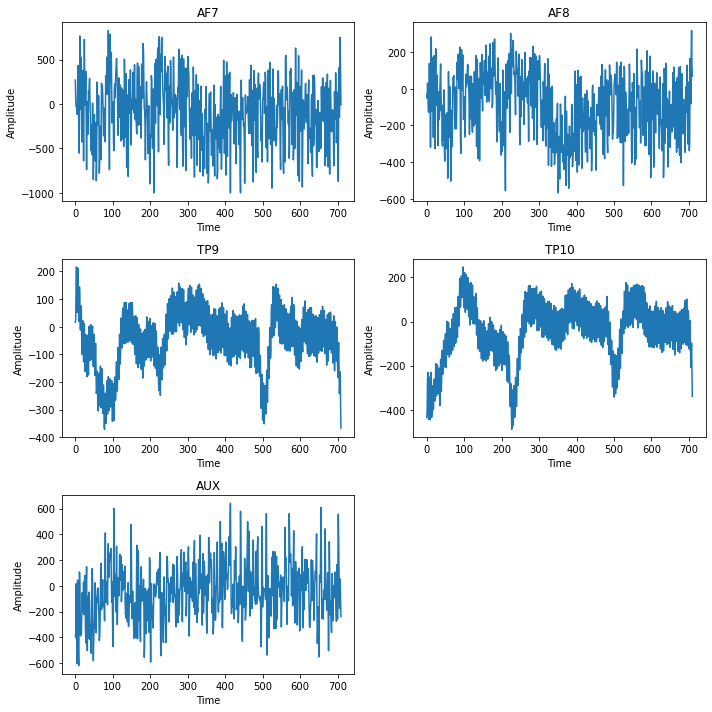

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

t = np.arange(lineNum)

fig = plt.figure(figsize=(10,10))

# raw signal plot
ax00 = fig.add_subplot(3,2,1)
ax00.plot(t, df['AF7'])
ax00.set_title('AF7')
ax00.set_xlabel('Time')
ax00.set_ylabel('Amplitude')

ax10 = fig.add_subplot(3,2,2)
ax10.plot(t, df['AF8'])
ax10.set_title('AF8')
ax10.set_xlabel('Time')
ax10.set_ylabel('Amplitude')

ax01 = fig.add_subplot(3,2,3)
ax01.plot(t, df['TP9'])
ax01.set_title('TP9')
ax01.set_xlabel('Time')
ax01.set_ylabel('Amplitude')

ax11 = fig.add_subplot(3,2,4)
ax11.plot(t, df['TP10'])
ax11.set_title('TP10')
ax11.set_xlabel('Time')
ax11.set_ylabel('Amplitude')

ax20 = fig.add_subplot(3,2,5)
ax20.plot(t, df['AUX'])
ax20.set_title('AUX')
ax20.set_xlabel('Time')
ax20.set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [12]:
df['AF7'][:200]

0      270.019531
1       41.992188
2      -31.250000
3      -35.644531
4      -41.503906
          ...    
195   -136.230469
196    -19.042969
197   -312.988281
198   -580.566406
199   -898.925781
Name: AF7, Length: 200, dtype: float64

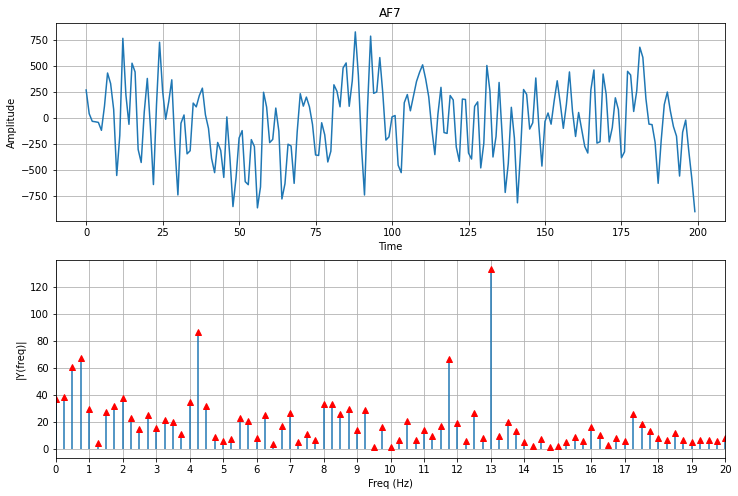

In [10]:
import scipy.io
from scipy.signal import butter, lfilter

# 0 ~ 199

n = 200 # 신호 길이 -> 고정
k = np.arange(n)
Fs = 50
T = n/Fs
freq = k/T
freq = freq[range(int(n/2))]

t = np.arange(200)

Y = np.fft.fft(df['AF7'][:200])/n # slice -> 수정
Y = Y[range(int(n/2))]

# raw fft plot
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].set_title('AF7')
ax[0].plot(t, df['AF7'][:200]) # slice -> 수정
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude');
ax[0].grid(True)
ax[1].plot(freq, abs(Y), 'r', linestyle=' ', marker='^') 
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].vlines(freq, [0], abs(Y))
ax[1].set_xticks(range(21))
ax[1].set_xlim(0, 20)
ax[1].grid(True)
plt.show()

In [95]:
# 0:0 1:4 2:8 3:12
# 4 ~ 7: 16 ~ 28
# 12 ~ 15: 48 ~ 60 
# 15 ~ 18: 60 ~ 72

# theta
for i in range(16, 28):
    theta += abs(Y)[i]

# smr
for i in range(48, 60):
    smr += abs(Y)[i]
    
# mBeta
for i in range(60, 72):
    mBeta += abs(Y)[i]
    
print(theta, smr, mBeta)

638.5915001477563 294.15511599661943 171.57216947104445


In [100]:
conc1 = (smr + mBeta) / theta
print(conc1)

conc = []
conc.append(conc1)
print(conc)

0.7293039217714371
[0.7293039217714371]


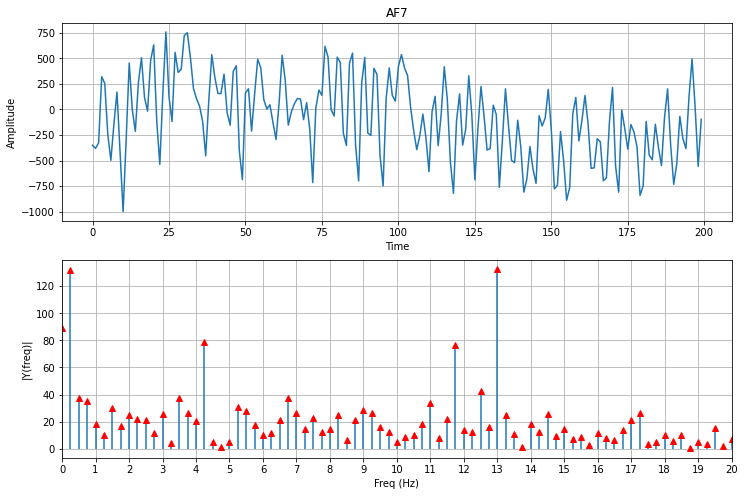

In [101]:
import scipy.io
from scipy.signal import butter, lfilter

n = 200 # 신호 길이 -> 고정
k = np.arange(n)
Fs = 50
T = n/Fs
freq = k/T
freq = freq[range(int(n/2))]

t = np.arange(200) # 신호 길이 -> 고정

Y = np.fft.fft(df['AF7'][200:400])/n # slice -> 수정
Y = Y[range(int(n/2))]

# raw fft plot
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].set_title('AF7')
ax[0].plot(t, df['AF7'][200:400]) # slice -> 수정
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude');
ax[0].grid(True)
ax[1].plot(freq, abs(Y), 'r', linestyle=' ', marker='^') 
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].vlines(freq, [0], abs(Y))
ax[1].set_xticks(range(21))
ax[1].set_xlim([0, 20])
ax[1].grid(True)
plt.show()

In [102]:
# 0:0 1:4 2:8 3:12
# 4 ~ 7: 16 ~ 28
# 12 ~ 15: 48 ~ 60 
# 15 ~ 18: 60 ~ 72

# theta
for i in range(16, 28):
    theta += abs(Y)[i]

# smr
for i in range(48, 60):
    smr += abs(Y)[i]
    
# mBeta
for i in range(60, 72):
    mBeta += abs(Y)[i]
    
print(theta, smr, mBeta)

272.18768704882444 323.18854349852114 130.17473238512375


In [103]:
conc2 = (smr + mBeta) / theta
print(conc2)

conc.append(conc2)
print(conc)

1.665627423485624
[0.7293039217714371, 1.665627423485624]


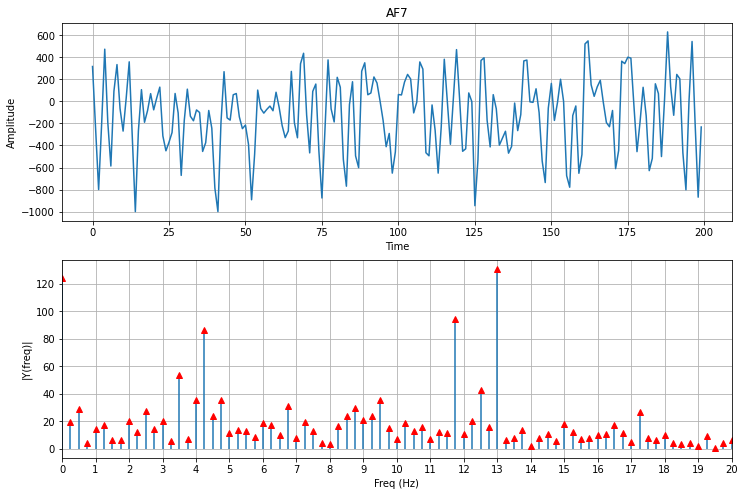

In [104]:
import scipy.io
from scipy.signal import butter, lfilter

n = 200 # 신호 길이 -> 고정
k = np.arange(n)
Fs = 50 # -> 고정
T = n/Fs
freq = k/T
freq = freq[range(int(n/2))]

t = np.arange(200) # 신호 길이 -> 고정

Y = np.fft.fft(df['AF7'][400:600])/n # slice -> 수정
Y = Y[range(int(n/2))]

# raw fft plot
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].set_title('AF7')
ax[0].plot(t, df['AF7'][400:600]) # slice -> 수정
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude');
ax[0].grid(True)
ax[1].plot(freq, abs(Y), 'r', linestyle=' ', marker='^') 
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].vlines(freq, [0], abs(Y))
ax[1].set_xticks(range(21))
ax[1].set_xlim([0, 20])
ax[1].grid(True)
plt.show()

In [105]:
# 0:0 1:4 2:8 3:12
# 4 ~ 7: 16 ~ 28
# 12 ~ 15: 48 ~ 60 
# 15 ~ 18: 60 ~ 72

# theta
for i in range(16, 28):
    theta += abs(Y)[i]

# smr
for i in range(48, 60):
    smr += abs(Y)[i]
    
# mBeta
for i in range(60, 72):
    mBeta += abs(Y)[i]
    
print(theta, smr, mBeta)

576.881797503448 598.568843304493 271.8427612243111


In [106]:
conc3 = (smr + mBeta) / theta
print(conc3)

conc.append(conc3)
print(conc)

1.5088214055212963
[0.7293039217714371, 1.665627423485624, 1.5088214055212963]


In [16]:
# band pass filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

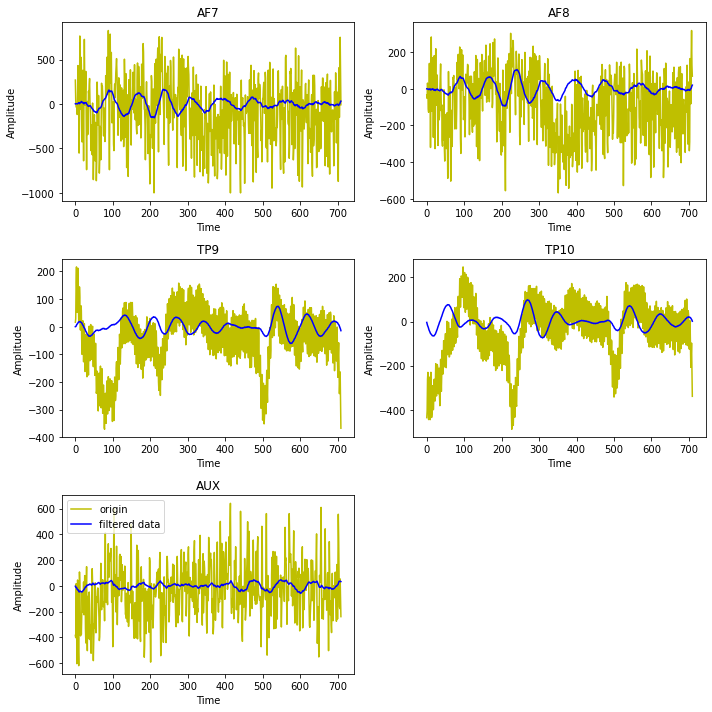

In [17]:
# SMR (12~15)

lowcut = 12
highcut = 15

# BPF
yy_af7 = butter_bandpass_filter(df['AF7'], lowcut, highcut, Fs, order=1)
yy_af8 = butter_bandpass_filter(df['AF8'], lowcut, highcut, Fs, order=1)
yy_tp9 = butter_bandpass_filter(df['TP9'], lowcut, highcut, Fs, order=1)
yy_tp10 = butter_bandpass_filter(df['TP10'], lowcut, highcut, Fs, order=1)
yy_aux = butter_bandpass_filter(df['AUX'], lowcut, highcut, Fs, order=1)

# 1. 원 신호 Plot
# 2. 필터 적용된 Plot
fig = plt.figure(figsize=(10,10))

bx00 = fig.add_subplot(3,2,1)
bx00.plot(t, df['AF7'], 'y', label='origin')
bx00.plot(t, yy_af7, 'b', label='filtered data')
bx00.set_title('AF7')
bx00.set_xlabel('Time')
bx00.set_ylabel('Amplitude')

bx10 = fig.add_subplot(3,2,2)
bx10.plot(t, df['AF8'], 'y', label='origin')
bx10.plot(t, yy_af8, 'b', label='filtered data')
bx10.set_title('AF8')
bx10.set_xlabel('Time')
bx10.set_ylabel('Amplitude')

bx01 = fig.add_subplot(3,2,3)
bx01.plot(t, df['TP9'], 'y', label='origin')
bx01.plot(t, yy_tp9, 'b', label='filtered data')
bx01.set_title('TP9')
bx01.set_xlabel('Time')
bx01.set_ylabel('Amplitude')

bx11 = fig.add_subplot(3,2,4)
bx11.plot(t, df['TP10'], 'y', label='origin')
bx11.plot(t, yy_tp10, 'b', label='filtered data')
bx11.set_title('TP10')
bx11.set_xlabel('Time')
bx11.set_ylabel('Amplitude')

bx20 = fig.add_subplot(3,2,5)
bx20.plot(t, df['AUX'], 'y', label='origin')
bx20.plot(t, yy_aux, 'b', label='filtered data')
bx20.set_title('AUX')
bx20.set_xlabel('Time')
bx20.set_ylabel('Amplitude')

plt.tight_layout()
plt.legend()
plt.show()

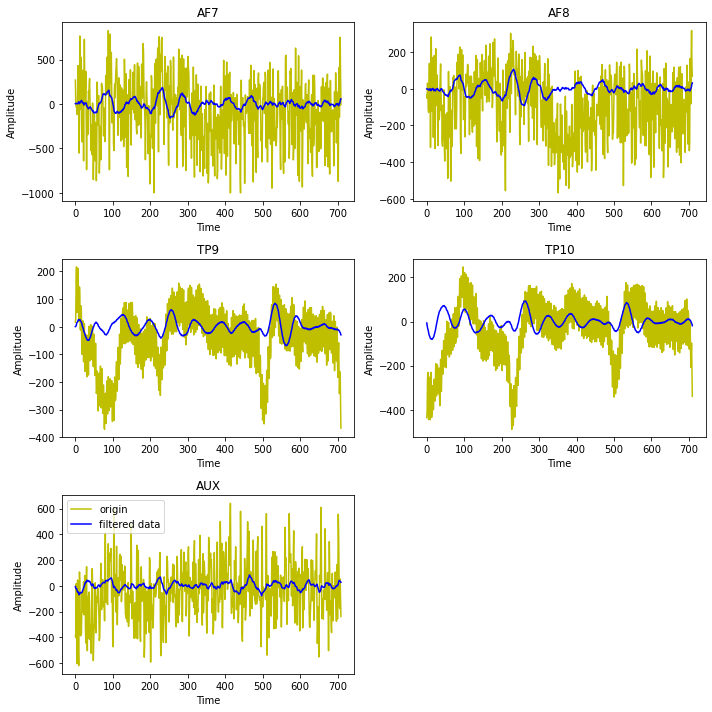

In [18]:
# mid Beta (15~20)

lowcut = 15
highcut = 20

# BPF
yy_af7 = butter_bandpass_filter(df['AF7'], lowcut, highcut, Fs, order=1)
yy_af8 = butter_bandpass_filter(df['AF8'], lowcut, highcut, Fs, order=1)
yy_tp9 = butter_bandpass_filter(df['TP9'], lowcut, highcut, Fs, order=1)
yy_tp10 = butter_bandpass_filter(df['TP10'], lowcut, highcut, Fs, order=1)
yy_aux = butter_bandpass_filter(df['AUX'], lowcut, highcut, Fs, order=1)

# 1. 원 신호 Plot
# 2. 필터 적용된 Plot
fig = plt.figure(figsize=(10,10))

bx00 = fig.add_subplot(3,2,1)
bx00.plot(t, df['AF7'], 'y', label='origin')
bx00.plot(t, yy_af7, 'b', label='filtered data')
bx00.set_title('AF7')
bx00.set_xlabel('Time')
bx00.set_ylabel('Amplitude')

bx10 = fig.add_subplot(3,2,2)
bx10.plot(t, df['AF8'], 'y', label='origin')
bx10.plot(t, yy_af8, 'b', label='filtered data')
bx10.set_title('AF8')
bx10.set_xlabel('Time')
bx10.set_ylabel('Amplitude')

bx01 = fig.add_subplot(3,2,3)
bx01.plot(t, df['TP9'], 'y', label='origin')
bx01.plot(t, yy_tp9, 'b', label='filtered data')
bx01.set_title('TP9')
bx01.set_xlabel('Time')
bx01.set_ylabel('Amplitude')

bx11 = fig.add_subplot(3,2,4)
bx11.plot(t, df['TP10'], 'y', label='origin')
bx11.plot(t, yy_tp10, 'b', label='filtered data')
bx11.set_title('TP10')
bx11.set_xlabel('Time')
bx11.set_ylabel('Amplitude')

bx20 = fig.add_subplot(3,2,5)
bx20.plot(t, df['AUX'], 'y', label='origin')
bx20.plot(t, yy_aux, 'b', label='filtered data')
bx20.set_title('AUX')
bx20.set_xlabel('Time')
bx20.set_ylabel('Amplitude')

plt.tight_layout()
plt.legend()
plt.show()

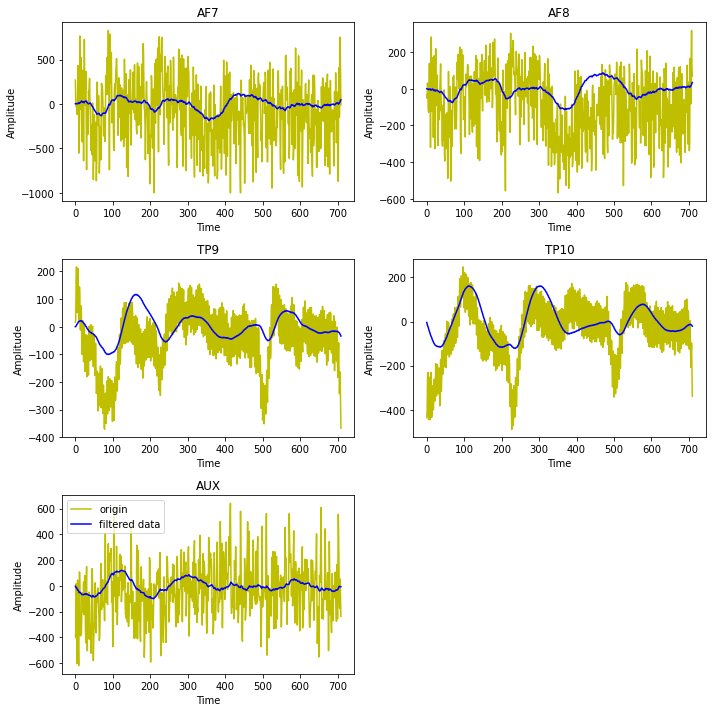

In [20]:
# Theta (4~7)

lowcut = 4
highcut = 7

# BPF
yy_af7 = butter_bandpass_filter(df['AF7'], lowcut, highcut, Fs, order=1)
yy_af8 = butter_bandpass_filter(df['AF8'], lowcut, highcut, Fs, order=1)
yy_tp9 = butter_bandpass_filter(df['TP9'], lowcut, highcut, Fs, order=1)
yy_tp10 = butter_bandpass_filter(df['TP10'], lowcut, highcut, Fs, order=1)
yy_aux = butter_bandpass_filter(df['AUX'], lowcut, highcut, Fs, order=1)

# 1. 원 신호 Plot
# 2. 필터 적용된 Plot
fig = plt.figure(figsize=(10,10))

bx00 = fig.add_subplot(3,2,1)
bx00.plot(t, df['AF7'], 'y', label='origin')
bx00.plot(t, yy_af7, 'b', label='filtered data')
bx00.set_title('AF7')
bx00.set_xlabel('Time')
bx00.set_ylabel('Amplitude')

bx10 = fig.add_subplot(3,2,2)
bx10.plot(t, df['AF8'], 'y', label='origin')
bx10.plot(t, yy_af8, 'b', label='filtered data')
bx10.set_title('AF8')
bx10.set_xlabel('Time')
bx10.set_ylabel('Amplitude')

bx01 = fig.add_subplot(3,2,3)
bx01.plot(t, df['TP9'], 'y', label='origin')
bx01.plot(t, yy_tp9, 'b', label='filtered data')
bx01.set_title('TP9')
bx01.set_xlabel('Time')
bx01.set_ylabel('Amplitude')

bx11 = fig.add_subplot(3,2,4)
bx11.plot(t, df['TP10'], 'y', label='origin')
bx11.plot(t, yy_tp10, 'b', label='filtered data')
bx11.set_title('TP10')
bx11.set_xlabel('Time')
bx11.set_ylabel('Amplitude')

bx20 = fig.add_subplot(3,2,5)
bx20.plot(t, df['AUX'], 'y', label='origin')
bx20.plot(t, yy_aux, 'b', label='filtered data')
bx20.set_title('AUX')
bx20.set_xlabel('Time')
bx20.set_ylabel('Amplitude')

plt.tight_layout()
plt.legend()
plt.show()